In [10]:
import pandas as pd
import numpy as np

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Webscraping

Week 4 | Day 4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe how web scraping works conceptually
- Explain how to Web Scraping works using python
- Define how to approach scraping project data

# Webscraping

In data science work, it is often necessary to retrieve data from websites. Occassionally, sites will provide an API that allows their data to be easily accessed, but often this isn't the case. When an API is not available, the only real option is to build a webscraper. 


A webscraper retrieves the webpage in the same way your browser retrieves the page, but because we're doing it with code, we are able to parse the resulting site's content.


**So how can we retrieve webpage content programmatically?**<br>
The first step is to understand how HTTP works...

## HTTP

Hypertext Transfer Protocol, or HTTP, is a text-based standard that allows clients and servers to communicate over TCP/IP. 

**HTTP  = the language computers communicate with**<br>
**TCP/IP = the channel over which that communication takes place**

HTTP is based on a client-server model. A client makes a request for some resource, and the server responds with the status of that request and the resource if available.

## HTTP Requests

There are two common types of HTTP requests: **GET and POST**

### GET Requests

GET requests are by far the most common, they simply ask the server to retrieve some resource, typically a webpage, and to return it.

<img src="http://i.imgur.com/qBG7jmB.png" width="900">

### POST Requests

A POST request is nearly identical to a GET request, but includes a payload of some sort in the request body. 

<img src="http://i.imgur.com/mzWB0wD.png" width=900>

## Typical Use Cases

GET requests are the standard way to request a webpage (as your browser would do). Some simple forms will use get as well. 

More sophisticated forms will utilize a POST request. GET requests pass parameters in the URL, while POST requests do not. This tends to make POST request more secure. 

N.B. Do not rely on POST alone as a security measure!

## So once you make a request, naturally you expect a response...


In the language of http, responses are provided first as a code

## HTTP Response Codes

- 1XX - Informational
- 2XX - Success
- 3XX - Redirection
- 4XX - Client Error
- 5XX - Server Error

### Response Codes - The Greatest Hits

- **200 - OK** - The requested action was successfully executed
- **301 - Moved Permanently** - The resource has been relocated (and will not be back, so please stop asking me)
- **400 - Bad Request** - The the client request is malformed in some way
- **403 - Forbidden** - The requesting client (i.e. you) does not have permission to view the resource
- **404 - Not Found** - The resource can't be found at the moment (may be in the future, so check back later)
- **405 - Method Not Allowed** - Used GET when only POST was applicable for example
- **418 - I'm a teapot** - For when the server is a teapot
- **420 - NOT an HTTP code** - you're thinking of something else
- **429 - Too Many Requests** - They're on to you and if you keep it up, they'll block you permenantly
- **500 - Internal Server Error** -Some non-specific bad happened on their end
- **502 - Bad Gateway** - The server was waiting on another resource and it ended badly
- **503 - Service Unavailable** - The server is overloaded or down at the moment

## So that is the basic language of the web, now how do we actually use this to get our content...

## Python Requests

<img src="http://i.imgur.com/qpfNAPb.png" width="900">

Requests allows us to send the server a request using (POST or GET) and in return we receive our response code and content where applicable.

## First, we make a request to retrieve a website

In [11]:
import requests

In [12]:
r = requests.get('http://news.ycombinator.com')

## We can check the response code

In [13]:
r

<Response [200]>

### Check: What is a 200? Is that good or bad for what we're trying to do?

In [14]:
# It means successful code 

## Let's see the request headers we sent

In [15]:
r.request.headers

{'Connection': 'keep-alive', 'Cookie': '__cfduid=daec9264a83e0088cfea1159955dae49b1476385624', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'User-Agent': 'python-requests/2.11.1'}

In [16]:
# we can print those out nicely
for k, v in r.request.headers.items():
    print(k + ':', v)

('Connection:', 'keep-alive')
('Accept-Encoding:', 'gzip, deflate')
('Accept:', '*/*')
('User-Agent:', 'python-requests/2.11.1')
('Cookie:', '__cfduid=daec9264a83e0088cfea1159955dae49b1476385624')


## We can also see the response headers

In [17]:
r.headers

{'Content-Encoding': 'gzip', 'Transfer-Encoding': 'chunked', 'Strict-Transport-Security': 'max-age=31556900; includeSubDomains', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare-nginx', 'Connection': 'keep-alive', 'Cache-Control': 'private, max-age=0', 'Date': 'Thu, 13 Oct 2016 19:07:04 GMT', 'X-Frame-Options': 'DENY', 'Content-Type': 'text/html; charset=utf-8', 'CF-RAY': '2f151289eeaa1888-EWR'}

In [18]:
for k, v in r.headers.items():
    print(k + ':', v)

('Date:', 'Thu, 13 Oct 2016 19:07:04 GMT')
('Content-Type:', 'text/html; charset=utf-8')
('Transfer-Encoding:', 'chunked')
('Connection:', 'keep-alive')
('Vary:', 'Accept-Encoding')
('Cache-Control:', 'private, max-age=0')
('X-Frame-Options:', 'DENY')
('Strict-Transport-Security:', 'max-age=31556900; includeSubDomains')
('Content-Encoding:', 'gzip')
('Server:', 'cloudflare-nginx')
('CF-RAY:', '2f151289eeaa1888-EWR')


## Let's see what content came back

In [19]:
r.content

'<html op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?0jKc9Keyn2Zl7D1UAQcy">\n        <link rel="shortcut icon" href="favicon.ico">\n          <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">\n        <title>Hacker News</title>\n      </head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">\n        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="http://www.ycombinator.com"><img src="y18.gif" width="18" height="18" style="border:1px white solid;"></a></td>\n                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>\n              <a href="newest">new</a> | <a href="newcomments">comments</

## We can wrap that in HTML to see the code

In [20]:
from IPython.core.display import HTML
HTML(r.content.decode('utf-8'))

## Exercise

- Using the requests library, retrieve a wepage of your choosing with a GET request
- Examine the response code, the headers, and the content
- Use ```IPython.core.display's HTML()``` to display the page in your notebook 
- Compare the results with the actual page you requested in your browser

In [21]:
r = requests.get('http://www.vice.com/en_us')

In [22]:
r

<Response [200]>

In [23]:
r.request.headers

{'Connection': 'keep-alive', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'User-Agent': 'python-requests/2.11.1'}

In [24]:
r.headers

{'Content-Length': '14511', 'Strict-Transport-Security': 'max-age=0; includeSubDomains', 'X-Cache': 'Miss from cloudfront', 'Content-Encoding': 'gzip', 'Expires': 'Thu, 13 Oct 2016 19:15:38 GMT', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Server': 'nginx', 'Connection': 'keep-alive', 'X-XSS-Protection': '1; mode=block', 'X-Amz-Cf-Id': '6ZHVrWUcs2_-ypnzvjDCvB68Jn7pZc-bh1AE4OdG2EEB7x6x6n0x7A==', 'Pragma': 'public', 'Cache-Control': 'max-age=1500, must-revalidate', 'Date': 'Thu, 13 Oct 2016 19:13:05 GMT', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Type': 'text/html; charset=UTF-8', 'Via': '1.1 9c3935366a39acd2af942625478df61e.cloudfront.net (CloudFront)'}

In [25]:
for k, v in r.headers.items():
    print(k + ':', v)

('Content-Type:', 'text/html; charset=UTF-8')
('Content-Length:', '14511')
('Connection:', 'keep-alive')
('Cache-Control:', 'max-age=1500, must-revalidate')
('Content-Encoding:', 'gzip')
('Date:', 'Thu, 13 Oct 2016 19:13:05 GMT')
('Expires:', 'Thu, 13 Oct 2016 19:15:38 GMT')
('Pragma:', 'public')
('Server:', 'nginx')
('Strict-Transport-Security:', 'max-age=0; includeSubDomains')
('Vary:', 'Accept-Encoding, Accept-Encoding')
('X-Frame-Options:', 'SAMEORIGIN')
('X-XSS-Protection:', '1; mode=block')
('X-Cache:', 'Miss from cloudfront')
('Via:', '1.1 9c3935366a39acd2af942625478df61e.cloudfront.net (CloudFront)')
('X-Amz-Cf-Id:', '6ZHVrWUcs2_-ypnzvjDCvB68Jn7pZc-bh1AE4OdG2EEB7x6x6n0x7A==')


In [26]:
r.content

'<!doctype html>\n<html class="no-js" lang="en">\n<head prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article#">\n\n<meta charset="utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<meta property="og:title" content="VICE | United States | The Definitive Guide to Enlightening Information" />\n<meta name="twitter:title" content="VICE | United States | The Definitive Guide to Enlightening Information" />\n<meta name="keywords" content="vice, vice.com, journalism online" />\n<meta name="description" content="VICE.com is an ever-expanding nebula of immersive investigative journalism, uncomfortable sociological examination, uncouth activities, making fun of people who should know better, and award-winning documentaries from a worldwide network of contributors" />\n<meta property="og:description" content="VICE.com is an ever-expanding nebula of immersive investigative journalism, uncomf

In [ ]:
from IPython.core.display import HTML
HTML(r.content.decode('utf-8'))

In [27]:
HTML(r.content.decode('utf-8'))

In [ ]:
mm = requests.get

## Webscraping - The Struggle is real

- Robots.txt
- User Agent
- Ajax

## Ajax - The enemy of the webscraper

In [28]:
r2 = requests.get('https://www.google.com/#q=data+science')

In [29]:
r2

<Response [200]>

In [30]:
# notice anything missing?
HTML(r2.content.decode('latin-1'))

,,Advanced searchLanguage tools


## What is AJAX?

>Conventional web applications transmit information to and from the server using synchronous requests. It means you fill out a form, hit submit, and get directed to a new page with new information from the server.

>With AJAX, when you hit submit, JavaScript will make a request to the server, interpret the results, and **update the current screen**. In the purest sense, the user would never know that anything was even transmitted to the server.

## How do you handle Ajax?

If a site uses ajax on content you need to scrape, **you will have to use a browser object** to retrieve it. 

The difference between a library like requests and an actual browser object is that requests just sends and receives text. The browser object "renders" the webpage just like Firefox or Chrome does. 

So how do we do this? We'll need to libraries to accomplish this...


- Selenium

- PhantomJS

## Selenium

- Selenium is a browser automation library (used extensively in testing)<br>

 <img src="http://i.imgur.com/WLs22wp.png" width=500>

## PhantomJS

PhantomJS is a "headless" browswer. It allows us all the functionality available in a full browser, but without the overhead of a UI.

<img src="http://i.imgur.com/hN5trU9.png" width="500">

## Using Selenium with PhantomJS

In [38]:
from selenium import webdriver

driver = webdriver.PhantomJS(executable_path='/Users/macbook/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1024, 768) 
driver.get('https://www.google.com/#q=spring+flowers')

In [48]:
driver = webdriver.PhantomJS(executable_path='/Users/macbook/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1024, 768) 
driver.get('https://news.google.com/')


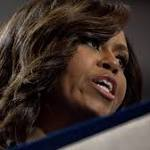
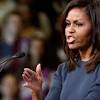
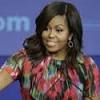
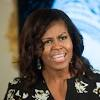
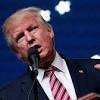
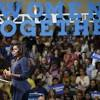
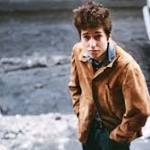
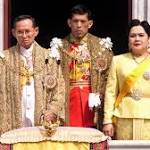
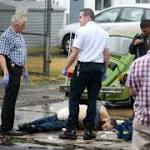

In [49]:
HTML(driver.page_source)

In [39]:
# .page_source gives us our document
HTML(driver.page_source)

## Exercise
1. Pip install selenium 
2. Download and unzip phantomJS 2.1.1 from https://bitbucket.org/ariya/phantomjs/downloads
3. Use the library to pull down an ajax-based page such as Google search results

# Now how do we get the content we want from the page?

## DOM

> The Document Object Model (DOM) is a programming interface for HTML and XML documents. It provides a structured representation of the document and it defines a way that the structure can be accessed from programs so that they can change the document structure, style and content. The DOM provides a representation of the document as a structured group of nodes and objects that have properties and methods. Essentially, it connects web pages to scripts or programming languages.

## Typical Web Page Structure

    <html>
        <head>
        </head>
        <body>
            <div id="header" class="extraFancy">I'm a header!</div>
            <div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
                    <li>I'm list item 2</li>
                </ul>
            </div>
            <div id="footer" class="extraFancy">I'm a footer</div>
        </body>
    </html>

In [42]:
page_html = """
    <html>
        <head>
        <title>Super Cool Website!</title>
        </head>
        <body>
            <div id="header" class="extraFancy">I'm a header!</div>
            <div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
                    <li>I'm list item 2</li>
                </ul>
            </div>
            <div id="footer" class="extraFancy">I'm a footer</div>
        </body>
    </html>
"""

## We're going to feed this full HTML into a library called Beautiful Soup

<img src="http://i.imgur.com/klVeXY7.png" width="800">

## Coding BeautifulSoup

In [40]:
from bs4 import BeautifulSoup

In [50]:
# Is python class

## Pass the HTML into the BS object

In [51]:
soup = BeautifulSoup(page_html, "lxml")

# "lxml" is a parsing library

From there it can be searched and parsed

## Print the html

In [44]:
print(soup.prettify())

<html>
 <head>
  <title>
   Super Cool Website!
  </title>
 </head>
 <body>
  <div class="extraFancy" id="header">
   I'm a header!
  </div>
  <div id="main">
   I'm a div!
   <ul>
    I'm an unordered list!
    <li>
     I'm list item 1
    </li>
    <li>
     I'm list item 2
    </li>
   </ul>
  </div>
  <div class="extraFancy" id="footer">
   I'm a footer
  </div>
 </body>
</html>



## Let's now do some parsing of the HTML using the DOM

## Get the title

In [52]:
soup.title

<title>Super Cool Website!</title>

In [53]:
soup.title.text

u'Super Cool Website!'

## Find - get the first result

In [55]:
soup.find('div')

# Will only give first one of multiple divs

<div class="extraFancy" id="header">I'm a header!</div>

## FindAll - get all matching results

In [57]:
i = 0
for d in soup.findAll('div'):
    print(i, d)
    print('\n')
    i += 1

(0, <div class="extraFancy" id="header">I'm a header!</div>)


(1, <div id="main">\n                I'm a div!\n                <ul>\n                    I'm an unordered list!\n                    <li>I'm list item 1</li>\n<li>I'm list item 2</li>\n</ul>\n</div>)


(2, <div class="extraFancy" id="footer">I'm a footer</div>)




## Get the page's text

In [58]:
print(soup.text)



Super Cool Website!


I'm a header!

                I'm a div!
                
                    I'm an unordered list!
                    I'm list item 1
I'm list item 2


I'm a footer





## Get the class of an element

In [59]:
# find returns the first result
soup.find('div')['class']

['extraFancy']

## Search by the id of an element

In [61]:
print(soup.find(id='main'))

<div id="main">
                I'm a div!
                <ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
<li>I'm list item 2</li>
</ul>
</div>


## Search by the class

In [62]:
#  note the underscore after class
print(soup.findAll(class_='extraFancy'))

[<div class="extraFancy" id="header">I'm a header!</div>, <div class="extraFancy" id="footer">I'm a footer</div>]


## Get the children of an element

In [84]:
my_ul = soup.find('ul')

In [57]:
print(my_ul)

<ul>
                    I'm an unordered list!
                    <li>I'm list item 1</li>
<li>I'm list item 2</li>
</ul>


In [54]:
my_ul.findChildren()

[<li>I'm list item 1</li>, <li>I'm list item 2</li>]

## Exercise

Using Requests and BeautifulSoup, pull down hacker news and print out the headlines and the story links in your notebook

In [70]:
rh = requests.get('http://news.ycombinator.com')

In [71]:
soup = BeautifulSoup(rh.content, "lxml")

In [72]:
print(soup.prettify())

<html op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?0jKc9Keyn2Zl7D1UAQcy" rel="stylesheet" type="text/css"/>
  <link href="favicon.ico" rel="shortcut icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="http://www.ycombinator.com">
          <img height="18" src="y18.gif" style="border:1px white solid;" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
           <a href="news">
   

In [81]:
print(soup.findAll(class_='title'))

[<td align="right" class="title" valign="top"><span class="rank">1.</span></td>, <td class="title"><a class="storylink" href="http://www.bitmatica.com/blog/an-open-source-self-hosted-heroku/">An Open Source, Self-Hosted Heroku</a><span class="sitebit comhead"> (<a href="from?site=bitmatica.com"><span class="sitestr">bitmatica.com</span></a>)</span></td>, <td align="right" class="title" valign="top"><span class="rank">2.</span></td>, <td class="title"><a class="storylink" href="http://petapixel.com/2016/10/11/cooled-nikon-d5500a-chills-sensor-clearer-star-photos/?utm_source=feedburner&amp;utm_medium=feed&amp;utm_campaign=Feed%25253A+PetaPixel+%252528PetaPixel%252529">Cooled Nikon D5500a Chills the Sensor for Clearer Star Photos</a><span class="sitebit comhead"> (<a href="from?site=petapixel.com"><span class="sitestr">petapixel.com</span></a>)</span></td>, <td align="right" class="title" valign="top"><span class="rank">3.</span></td>, <td class="title"><a class="storylink" href="http://w

In [88]:
for link in soup.findAll('a', class_='storylink'):
    print(link.text)
    print(link['href'])
    print('\n')

An Open Source, Self-Hosted Heroku
http://www.bitmatica.com/blog/an-open-source-self-hosted-heroku/


Cooled Nikon D5500a Chills the Sensor for Clearer Star Photos
http://petapixel.com/2016/10/11/cooled-nikon-d5500a-chills-sensor-clearer-star-photos/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%25253A+PetaPixel+%252528PetaPixel%252529


The Nobel Prize in Literature 2016 awarded to Bob Dylan
http://www.nobelprize.org/nobel_prizes/literature/laureates/2016/press.html


Google's “Director of Engineering” Hiring Test
http://www.gwan.com/blog/20160405.html


Inside the New York Public Library's Last, Secret Apartments
http://www.atlasobscura.com/articles/inside-the-new-york-public-librarys-last-secret-apartments


Ask HN: What is your favorite YouTube channel for developers?
item?id=12702651


Static types in Python, oh my(py)
http://blog.zulip.org/2016/10/13/static-types-in-python-oh-mypy/


Certificate Revocation Issue
https://downloads.globalsign.com/acton/fs/blocks/showLandi

## Now for the Easy Way

## Import.io

Using the URL, go to "http://www.zillow.com/new-york-city-ny/apartments/"

## Independent Practice

1. Programmatically run a google search for 'Data Science' using Selenium and PhantomJS

2. Retrieve only the links and their titles using BS - avoid getting the ads in your list

3. Place those into a DataFrame

In [90]:
from selenium import webdriver

ds = webdriver.PhantomJS(executable_path='/Users/macbook/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
ds.set_window_size(1024, 768) 
ds.get('https://www.google.com/#q=data+science')

In [91]:
ds

<selenium.webdriver.phantomjs.webdriver.WebDriver (session="fe946ef0-9184-11e6-8417-718526579a37")>